In [14]:
import pickle
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
OUTPUT_PATH = '../../../output_data/validation/'

In [24]:
SOT_PATH = OUTPUT_PATH + 'source_of_truth/'

In [205]:
DATA_PATH = '../../../input_data/synthetic_examples/input_data/'

In [25]:
os.listdir(SOT_PATH)

['Test0a_15min_Direct_QQ.csv',
 'Test0b_15min_Direct_QQ_RT.csv',
 'Test1_040116_15min_Direct_QQ.csv',
 'Test1_040116_30min_Direct_QQ.csv',
 'Test1_040116_45min_Direct_QQ.csv',
 'Test1_040116_60min_Direct_QQ.csv',
 'Test1_040116_90min_Direct_QQ.csv',
 'Test2_091215_15min_Direct_QQ.csv',
 'Test2_091215_30min_Direct_QQ.csv',
 'Test2_091215_45min_Direct_QQ.csv',
 'Test2_091215_60min_Direct_QQ.csv',
 'Test2_091215_90min_Direct_QQ.csv',
 'Test3_040116_15min_Direct_QQ.csv',
 'Test3_040116_30min_Direct_QQ.csv',
 'Test3_040116_45min_Direct_QQ.csv',
 'Test3_040116_60min_Direct_QQ.csv',
 'Test3_040116_90min_Direct_QQ.csv',
 'TestParameters_Statistics.xlsx']

## Validate One Line: Test0a

In [118]:
os.listdir(OUTPUT_PATH + 'one_line/')

['aa_0-264.pkl',
 'all_nodes.pkl',
 'morning_direct_edges.pkl',
 'morning_nodes.pkl',
 'morning_start_nodes.pkl',
 'morning_transfer_edges.pkl',
 'nearby_stops.csv',
 'nearby_stops.pkl',
 'sa_0-264.pkl']

In [119]:
aa_ol_df = pd.read_pickle(OUTPUT_PATH + 'one_line/aa_0-264.pkl')

In [121]:
# Limit to 15 min.
aa_ol_df = aa_ol_df[aa_ol_df['time_sec'] <= 900]

In [122]:
aa_ol_df.head()

,stop_id_source,stop_id_target,time_sec,stop_lon_target,stop_lat_target,arrival_target,stop_lon_source,stop_lat_source,departure
1,12882,12882,0.0,34.782786,32.091212,2015-12-14 07:28:33,34.782786,32.091212,2015-12-14 07:28:33
2,12882,13042,888.0,34.777718,32.062111,2015-12-14 07:43:21,34.782786,32.091212,2015-12-14 07:28:33
3,12882,13127,330.0,34.781148,32.078797,2015-12-14 07:34:03,34.782786,32.091212,2015-12-14 07:28:33
4,12882,13226,597.0,34.785356,32.069337,2015-12-14 07:38:30,34.782786,32.091212,2015-12-14 07:28:33
9,12882,13362,790.0,34.780759,32.064067,2015-12-14 07:41:43,34.782786,32.091212,2015-12-14 07:28:33


In [127]:
aa_ol_df.shape

(436, 9)

In [124]:
sot_ol_df = pd.read_csv(SOT_PATH + 'one_line/Test0a_15min_Direct_QQ.csv')

In [125]:
sot_ol_df.head()

,ID STOP START,TIME DEPART,ID STOP DEST,TIME ARRIVAL,TRAVEL TIME
0,13948,07:25:00,13948,07:25:00,0
1,13948,07:25:00,12936,07:27:00,120
2,13948,07:25:00,13049,07:27:57,177
3,13948,07:25:00,13100,07:28:53,233
4,13948,07:25:00,14349,07:29:55,295


In [126]:
sot_ol_df.shape

(517, 5)

In [129]:
sot_ol_min_df = sot_ol_df.loc[sot_ol_df.groupby(['ID STOP START', 'ID STOP DEST'])['TRAVEL TIME'].idxmin()]

In [130]:
sot_ol_min_df.shape

(517, 5)

In [131]:
ol_df = aa_ol_df.merge(sot_ol_df, left_on=['stop_id_source', 'stop_id_target'], right_on=['ID STOP START', 'ID STOP DEST'])

In [132]:
ol_df['diff'] = ol_df['time_sec'] - ol_df['TRAVEL TIME']

In [133]:
ol_df.head()

,stop_id_source,stop_id_target,time_sec,stop_lon_target,stop_lat_target,arrival_target,stop_lon_source,stop_lat_source,departure,ID STOP START,TIME DEPART,ID STOP DEST,TIME ARRIVAL,TRAVEL TIME,diff
0,12882,12882,0.0,34.782786,32.091212,2015-12-14 07:28:33,34.782786,32.091212,2015-12-14 07:28:33,12882,07:28:33,12882,07:28:33,0,0.0
1,12882,13042,888.0,34.777718,32.062111,2015-12-14 07:43:21,34.782786,32.091212,2015-12-14 07:28:33,12882,07:28:33,13042,07:43:21,888,0.0
2,12882,13127,330.0,34.781148,32.078797,2015-12-14 07:34:03,34.782786,32.091212,2015-12-14 07:28:33,12882,07:28:33,13127,07:34:03,330,0.0
3,12882,13226,597.0,34.785356,32.069337,2015-12-14 07:38:30,34.782786,32.091212,2015-12-14 07:28:33,12882,07:28:33,13226,07:38:30,597,0.0
4,12882,13362,790.0,34.780759,32.064067,2015-12-14 07:41:43,34.782786,32.091212,2015-12-14 07:28:33,12882,07:28:33,13362,07:41:43,790,0.0


In [134]:
ol_df[ol_df['diff'] != 0]

,stop_id_source,stop_id_target,time_sec,stop_lon_target,stop_lat_target,arrival_target,stop_lon_source,stop_lat_source,departure,ID STOP START,TIME DEPART,ID STOP DEST,TIME ARRIVAL,TRAVEL TIME,diff


## Validate Two Lines : Test0b

In [206]:
os.listdir(OUTPUT_PATH + 'two_lines')

['aa_4-552.pkl',
 'all_nodes.pkl',
 'morning_direct_edges.pkl',
 'morning_nodes.pkl',
 'morning_start_nodes.pkl',
 'morning_transfer_edges.pkl',
 'nearby_stops.csv',
 'nearby_stops.pkl',
 'sa_4-552.pkl']

In [207]:
aa_tl_df = pd.read_pickle(OUTPUT_PATH + 'two_lines/aa_4-552.pkl')

In [208]:
aa_tl_df = aa_tl_df[aa_tl_df['time_sec'] <= 900]

In [209]:
aa_tl_df.shape

(791, 9)

In [210]:
sot_tl_df = pd.read_csv(SOT_PATH + 'two_lines/Test0b_15min_Direct_QQ_RT.csv')

In [211]:
sot_tl_df.shape

(1327, 7)

In [212]:
sot_tl_min_df = sot_tl_df.loc[sot_tl_df.groupby(['ID STOP START', 'ID STOP DEST'])['TRAVEL TIME'].idxmin()]

In [213]:
sot_tl_min_df.shape

(1068, 7)

In [214]:
tl_df = aa_ol_df.merge(sot_tl_min_df, left_on=['stop_id_source', 'stop_id_target'], right_on=['ID STOP START', 'ID STOP DEST'])

In [215]:
tl_df.shape

(381, 16)

In [216]:
tl_df.head()

,stop_id_source,stop_id_target,time_sec,stop_lon_target,stop_lat_target,arrival_target,stop_lon_source,stop_lat_source,departure,ID STOP START,TIME DEPART,ID STOP DEST,TIME ARRIVAL,TRAVEL TIME,ORG_ROUTE_ID,DEST_ROUTE_ID
0,12882,12882,0.0,34.782786,32.091212,2015-12-14 07:28:33,34.782786,32.091212,2015-12-14 07:28:33,12882,07:28:33,12882,07:28:33,0,9823,9823
1,12882,13042,888.0,34.777718,32.062111,2015-12-14 07:43:21,34.782786,32.091212,2015-12-14 07:28:33,12882,07:28:33,13042,07:43:21,888,9823,9823
2,12882,13127,330.0,34.781148,32.078797,2015-12-14 07:34:03,34.782786,32.091212,2015-12-14 07:28:33,12882,07:28:33,13127,07:34:03,330,9823,9823
3,12882,13226,597.0,34.785356,32.069337,2015-12-14 07:38:30,34.782786,32.091212,2015-12-14 07:28:33,12882,07:28:33,13226,07:38:30,597,9823,9823
4,12882,13362,790.0,34.780759,32.064067,2015-12-14 07:41:43,34.782786,32.091212,2015-12-14 07:28:33,12882,07:28:33,13362,07:41:43,790,9823,9823


In [217]:
tl_df['diff'] = tl_df['time_sec'] - tl_df['TRAVEL TIME']

In [218]:
tl_df[tl_df['diff'] != 0]

,stop_id_source,stop_id_target,time_sec,stop_lon_target,stop_lat_target,arrival_target,stop_lon_source,stop_lat_source,departure,ID STOP START,TIME DEPART,ID STOP DEST,TIME ARRIVAL,TRAVEL TIME,ORG_ROUTE_ID,DEST_ROUTE_ID,diff


### Check what are the trips that appear in the source of truth but not in my computations (source-target pairs)

In [219]:
t1_outer_join = aa_ol_df.merge(sot_tl_min_df, left_on=['stop_id_source', 'stop_id_target'], right_on=['ID STOP START', 'ID STOP DEST'], how='outer')

In [220]:
t1_outer_join

,stop_id_source,stop_id_target,time_sec,stop_lon_target,stop_lat_target,arrival_target,stop_lon_source,stop_lat_source,departure,ID STOP START,TIME DEPART,ID STOP DEST,TIME ARRIVAL,TRAVEL TIME,ORG_ROUTE_ID,DEST_ROUTE_ID
0,12882.0,12882.0,0.0,34.782786,32.091212,2015-12-14 07:28:33,34.782786,32.091212,2015-12-14 07:28:33,12882.0,07:28:33,12882.0,07:28:33,0.0,9823.0,9823.0
1,12882.0,13042.0,888.0,34.777718,32.062111,2015-12-14 07:43:21,34.782786,32.091212,2015-12-14 07:28:33,12882.0,07:28:33,13042.0,07:43:21,888.0,9823.0,9823.0
2,12882.0,13127.0,330.0,34.781148,32.078797,2015-12-14 07:34:03,34.782786,32.091212,2015-12-14 07:28:33,12882.0,07:28:33,13127.0,07:34:03,330.0,9823.0,9823.0
3,12882.0,13226.0,597.0,34.785356,32.069337,2015-12-14 07:38:30,34.782786,32.091212,2015-12-14 07:28:33,12882.0,07:28:33,13226.0,07:38:30,597.0,9823.0,9823.0
4,12882.0,13362.0,790.0,34.780759,32.064067,2015-12-14 07:41:43,34.782786,32.091212,2015-12-14 07:28:33,12882.0,07:28:33,13362.0,07:41:43,790.0,9823.0,9823.0
5,12882.0,13598.0,364.0,34.781313,32.076684,2015-12-14 07:34:37,34.782786,32.091212,2015-12-14 07:28:33,12882.0,07:28:33,13598.0,07:34:37,364.0,9823.0,9823.0
6,12882.0,13679.0,214.0,34.781145,32.082462,2015-12-14 07:32:07,34.782786,32.091212,2015-12-14 07:28:33,12882.0,07:28:33,13679.0,07:32:07,214.0,9823.0,9823.0
7,12882.0,13680.0,109.0,34.782004,32.087089,2015-12-14 07:30:22,34.782786,32.091212,2015-12-14 07:28:33,12882.0,07:28:33,13680.0,07:30:22,109.0,9823.0,9823.0
8,12882.0,14530.0,467.0,34.781736,32.071828,2015-12-14 07:36:20,34.782786,32.091212,2015-12-14 07:28:33,12882.0,07:28:33,14530.0,07:36:20,467.0,9823.0,9823.0
9,12882.0,29488.0,400.0,34.781570,32.075101,2015-12-14 07:35:13,34.782786,32.091212,2015-12-14 07:28:33,12882.0,07:28:33,29488.0,07:35:13,400.0,9823.0,9823.0


In [221]:
t1_outer_join.shape

(1123, 16)

In [222]:
t1_outer_join.dropna().shape

(381, 16)

In [223]:
trips_not_in_my_computations_df = t1_outer_join[t1_outer_join['departure'].isna()]

In [224]:
trips_not_in_my_computations_df.shape

(687, 16)

In [225]:
trips_not_in_my_computations_df.head()

,stop_id_source,stop_id_target,time_sec,stop_lon_target,stop_lat_target,arrival_target,stop_lon_source,stop_lat_source,departure,ID STOP START,TIME DEPART,ID STOP DEST,TIME ARRIVAL,TRAVEL TIME,ORG_ROUTE_ID,DEST_ROUTE_ID
436,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,12816.0,07:28:16,12816.0,07:28:16,0.0,2517.0,2517.0
437,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,12816.0,07:28:16,12837.0,07:30:23,127.0,2517.0,2517.0
438,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,12816.0,07:28:16,12867.0,07:33:20,304.0,2517.0,2517.0
439,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,12837.0,07:20:23,12837.0,07:20:23,0.0,2517.0,2517.0
440,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,12837.0,07:20:23,12867.0,07:23:20,177.0,2517.0,2517.0


In [226]:
# Remove rows where source != target and where travel time is more than 900 seconds (15 minutes)
trips_not_in_my_computations_df = trips_not_in_my_computations_df[trips_not_in_my_computations_df['ID STOP START'] != trips_not_in_my_computations_df['ID STOP DEST']]
trips_not_in_my_computations_df = trips_not_in_my_computations_df[trips_not_in_my_computations_df['TRAVEL TIME'] <= 900]

In [227]:
trips_not_in_my_computations_df.shape

(322, 16)

In [228]:
trips_not_in_my_computations_df.head()

,stop_id_source,stop_id_target,time_sec,stop_lon_target,stop_lat_target,arrival_target,stop_lon_source,stop_lat_source,departure,ID STOP START,TIME DEPART,ID STOP DEST,TIME ARRIVAL,TRAVEL TIME,ORG_ROUTE_ID,DEST_ROUTE_ID
437,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,12816.0,07:28:16,12837.0,07:30:23,127.0,2517.0,2517.0
438,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,12816.0,07:28:16,12867.0,07:33:20,304.0,2517.0,2517.0
440,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,12837.0,07:20:23,12867.0,07:23:20,177.0,2517.0,2517.0
441,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,12843.0,07:24:31,12816.0,07:38:16,825.0,2517.0,2517.0
445,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,12843.0,07:24:31,13836.0,07:25:56,85.0,2517.0,2517.0


In [231]:
nodes_df = pd.read_pickle(OUTPUT_PATH + 'two_lines/morning_nodes.pkl')

In [232]:
nodes_df.head(1)

,index,trip_id,arrival_time,departure_time_stop,stop_id,stop_sequence,route_id,departure_time_trip_departure,stop_code,stop_lat,stop_lon,arrival,departure,node_id
0,22,18854212_161215,07:35:48,07:35:48,13257,30,9823,06:53:00,22557,32.040172,34.775255,2015-12-09 07:35:48,2015-12-09 07:35:48,0


In [233]:
nodes_df[nodes_df['stop_id'] == 12837]

,index,trip_id,arrival_time,departure_time_stop,stop_id,stop_sequence,route_id,departure_time_trip_departure,stop_code,stop_lat,stop_lon,arrival,departure,node_id
341,4024,19283212_161215,07:10:23,07:10:23,12837,30,2517,06:30:00,21041,32.058354,34.828604,2015-12-09 07:10:23,2015-12-09 07:10:23,341
342,4025,19283218_161215,08:07:23,08:07:23,12837,30,2517,07:27:00,21041,32.058354,34.828604,2015-12-09 08:07:23,2015-12-09 08:07:23,342
343,4026,19283220_161215,08:25:23,08:25:23,12837,30,2517,07:45:00,21041,32.058354,34.828604,2015-12-09 08:25:23,2015-12-09 08:25:23,343
344,4064,19283214_161215,07:30:23,07:30:23,12837,30,2517,06:50:00,21041,32.058354,34.828604,2015-12-09 07:30:23,2015-12-09 07:30:23,344
345,4065,19283215_161215,07:40:23,07:40:23,12837,30,2517,07:00:00,21041,32.058354,34.828604,2015-12-09 07:40:23,2015-12-09 07:40:23,345
346,4066,19283216_161215,07:49:23,07:49:23,12837,30,2517,07:09:00,21041,32.058354,34.828604,2015-12-09 07:49:23,2015-12-09 07:49:23,346
347,4067,19283217_161215,07:58:23,07:58:23,12837,30,2517,07:18:00,21041,32.058354,34.828604,2015-12-09 07:58:23,2015-12-09 07:58:23,347
348,4068,19283219_161215,08:16:23,08:16:23,12837,30,2517,07:36:00,21041,32.058354,34.828604,2015-12-09 08:16:23,2015-12-09 08:16:23,348
349,4072,19283213_161215,07:20:23,07:20:23,12837,30,2517,06:40:00,21041,32.058354,34.828604,2015-12-09 07:20:23,2015-12-09 07:20:23,349


In [235]:
nodes_df[nodes_df['node_id'] == 335]

,index,trip_id,arrival_time,departure_time_stop,stop_id,stop_sequence,route_id,departure_time_trip_departure,stop_code,stop_lat,stop_lon,arrival,departure,node_id
335,3967,19283214_161215,07:28:16,07:28:16,12816,29,2517,06:50:00,21002,32.059675,34.821988,2015-12-09 07:28:16,2015-12-09 07:28:16,335


In [236]:
nodes_df[nodes_df['node_id'] == 344]

,index,trip_id,arrival_time,departure_time_stop,stop_id,stop_sequence,route_id,departure_time_trip_departure,stop_code,stop_lat,stop_lon,arrival,departure,node_id
344,4064,19283214_161215,07:30:23,07:30:23,12837,30,2517,06:50:00,21041,32.058354,34.828604,2015-12-09 07:30:23,2015-12-09 07:30:23,344


In [241]:
nodes_df[nodes_df['node_id'] == 336]

,index,trip_id,arrival_time,departure_time_stop,stop_id,stop_sequence,route_id,departure_time_trip_departure,stop_code,stop_lat,stop_lon,arrival,departure,node_id
336,3968,19283215_161215,07:38:16,07:38:16,12816,29,2517,07:00:00,21002,32.059675,34.821988,2015-12-09 07:38:16,2015-12-09 07:38:16,336


In [243]:
transfers = pd.read_pickle(OUTPUT_PATH + 'two_lines/morning_transfer_edges.pkl')

In [240]:
for s, t, sec in transfers:
    if s == 335:
        print(f'source {s}, target {t}, time {sec}')

source 335, target 336, time 600.0


In [244]:
direct = pd.read_pickle(OUTPUT_PATH + 'two_lines/morning_direct_edges.pkl')

In [245]:
for s, t, sec in direct:
    if s == 335:
        print(f'source {s}, target {t}, time {sec}')

source 335, target 344, time 127.0


In [229]:
# Check if all rows are direct trips.
# trips_not_in_my_computations_df[trips_not_in_my_computations_df['ORG_ROUTE_ID'] != trips_not_in_my_computations_df['DEST_ROUTE_ID']]

In [230]:
aa1_df[aa1_df['stop_id_source'] == 12816]

,stop_id_source,stop_id_target,time_sec,stop_lon_target,stop_lat_target,arrival_target,stop_lon_source,stop_lat_source,departure


In [247]:
aa_tl_df[aa_tl_df['stop_id_source'] == 12816]

,stop_id_source,stop_id_target,time_sec,stop_lon_target,stop_lat_target,arrival_target,stop_lon_source,stop_lat_source,departure
0,12816,12816,0.0,34.821988,32.059675,2015-12-09 07:28:16,34.821988,32.059675,2015-12-09 07:28:16
1,12816,12837,127.0,34.828604,32.058354,2015-12-09 07:20:23,34.821988,32.059675,2015-12-09 07:18:16
2,12816,12867,304.0,34.833911,32.055035,2015-12-09 07:23:20,34.821988,32.059675,2015-12-09 07:18:16


This stop is **not even a source stop** in my computations. 
## TODO: Fix

In [198]:
with open(OUTPUT_PATH + 'test1/morning_start_nodes.pkl', 'rb') as f:
    t1_start_nodes = pickle.load(f)

In [200]:
t1_start_nodes[:5]

['1', '2', '11', '12', '21']

In [201]:
12816 in t1_start_nodes

False

In [202]:
t1_nodes_df = pd.read_pickle(OUTPUT_PATH + 'test1/morning_nodes.pkl')

In [203]:
t1_nodes_df.head()

,index,trip_id,arrival_time,departure_time_stop,stop_id,stop_sequence,route_id,departure_time_trip_departure,stop_code,stop_lat,stop_lon,arrival,departure,node_id
0,25,19285956_151215,07:08:00,07:08:00,25123,1,2544,07:08:00,38160,32.050923,34.849426,2016-01-04 07:08:00,2016-01-04 07:08:00,0
1,26,19285957_151215,07:17:00,07:17:00,25123,1,2544,07:17:00,38160,32.050923,34.849426,2016-01-04 07:17:00,2016-01-04 07:17:00,1
2,27,19285958_151215,07:26:00,07:26:00,25123,1,2544,07:26:00,38160,32.050923,34.849426,2016-01-04 07:26:00,2016-01-04 07:26:00,2
3,28,19285959_151215,07:35:00,07:35:00,25123,1,2544,07:35:00,38160,32.050923,34.849426,2016-01-04 07:35:00,2016-01-04 07:35:00,3
4,29,19285960_151215,07:45:00,07:45:00,25123,1,2544,07:45:00,38160,32.050923,34.849426,2016-01-04 07:45:00,2016-01-04 07:45:00,4


In [204]:
t1_nodes_df[t1_nodes_df['stop_id'] == 12816]

,index,trip_id,arrival_time,departure_time_stop,stop_id,stop_sequence,route_id,departure_time_trip_departure,stop_code,stop_lat,stop_lon,arrival,departure,node_id


The node is not even present in the list of nodes... is the stop even given to us? 

## Validate Test 1

In [150]:
os.listdir(OUTPUT_PATH + 'test1/')

['aa_1-661.pkl',
 'all_nodes.pkl',
 'morning_direct_edges.pkl',
 'morning_nodes.pkl',
 'morning_start_nodes.pkl',
 'morning_transfer_edges.pkl',
 'nearby_stops.csv',
 'nearby_stops.pkl',
 'sa_1-601.pkl']

In [151]:
aa1_df = pd.read_pickle(OUTPUT_PATH + 'test1/aa_1-661.pkl')

In [152]:
aa1_df.shape

(1583, 9)

In [156]:
sot_1_df = pd.read_csv(SOT_PATH + 'test1/Test1_040116_60min_Direct_QQ.csv')
sot_1_min_df = sot_1_df.loc[sot_1_df.groupby(['ID STOP START', 'ID STOP DEST'])['TRAVEL TIME'].idxmin()]
t1_df = aa1_df.merge(sot_1_min_df, left_on=['stop_id_source', 'stop_id_target'], right_on=['ID STOP START', 'ID STOP DEST'])
t1_df['diff'] = t1_df['time_sec'] - t1_df['TRAVEL TIME']

In [160]:
t1_df.shape

(1579, 15)

In [158]:
t1_prob_df = t1_df[t1_df['diff'] != 0]

In [159]:
t1_prob_df.shape

(191, 15)

In [161]:
t1_prob_df.head()

,stop_id_source,stop_id_target,time_sec,stop_lon_target,stop_lat_target,arrival_target,stop_lon_source,stop_lat_source,departure,ID STOP START,TIME DEPART,ID STOP DEST,TIME ARRIVAL,TRAVEL TIME,diff
64,12962,12834,1719.0,34.784677,32.084755,2016-01-04 07:52:45,34.844303,32.076767,2016-01-04 07:24:06,12962,07:24:06,12834,07:47:45,1419,300.0
65,12962,12841,1659.0,34.787875,32.084074,2016-01-04 07:51:45,34.844303,32.076767,2016-01-04 07:24:06,12962,07:24:06,12841,07:46:45,1359,300.0
66,12962,12889,1484.0,34.795442,32.082455,2016-01-04 07:48:50,34.844303,32.076767,2016-01-04 07:24:06,12962,07:24:06,12889,07:43:50,1184,300.0
68,12962,12894,1821.0,34.778794,32.086040,2016-01-04 07:54:27,34.844303,32.076767,2016-01-04 07:24:06,12962,07:24:06,12894,07:49:27,1521,300.0
83,12962,13296,2504.0,34.772032,32.065619,2016-01-04 08:05:50,34.844303,32.076767,2016-01-04 07:24:06,12962,07:24:06,13296,08:00:50,2204,300.0


(array([1388.,    0.,   11.,    0.,   45.,    0.,    0.,    0.,   45.,
          90.]),
 array([  0.,  30.,  60.,  90., 120., 150., 180., 210., 240., 270., 300.]),
 <a list of 10 Patch objects>)

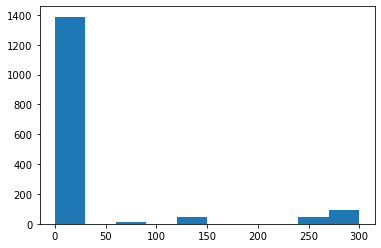

In [162]:
plt.hist(t1_df['diff'])

(array([11.,  0., 45.,  0.,  0.,  0.,  0., 45.,  0., 90.]),
 array([ 60.,  84., 108., 132., 156., 180., 204., 228., 252., 276., 300.]),
 <a list of 10 Patch objects>)

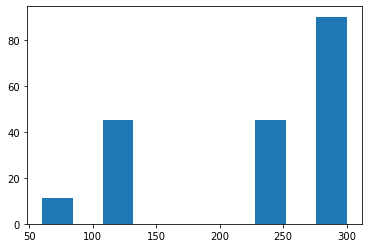

In [163]:
plt.hist(t1_prob_df['diff'])

In [165]:
t1_prob_df.shape

(191, 15)

In [164]:
t1_prob_df.nunique()

stop_id_source      13
stop_id_target      26
time_sec           184
stop_lon_target     26
stop_lat_target     26
arrival_target      56
stop_lon_source     13
stop_lat_source     13
departure           13
ID STOP START       13
TIME DEPART         12
ID STOP DEST        26
TIME ARRIVAL        56
TRAVEL TIME        183
diff                 4
dtype: int64

## Validate Test 2

In [28]:
os.listdir(OUTPUT_PATH + 'test2/')

['aa_2-609.pkl',
 'all_nodes.pkl',
 'morning_direct_edges.pkl',
 'morning_nodes.pkl',
 'morning_start_nodes.pkl',
 'morning_transfer_edges.pkl',
 'nearby_stops.csv',
 'nearby_stops.pkl',
 'sa_2-609.pkl']

In [31]:
aa_df = pd.read_pickle(OUTPUT_PATH + 'test2/aa_2-609.pkl')

In [33]:
aa_df.head()

,stop_id_source,stop_id_target,time_sec,stop_lon_target,stop_lat_target,arrival_target,stop_lon_source,stop_lat_source,departure
0,12898,12898,0.0,34.840303,32.092561,2015-12-09 07:24:38,34.840303,32.092561,2015-12-09 07:24:38
1,12898,16202,484.0,34.870193,32.090942,2015-12-09 07:32:42,34.840303,32.092561,2015-12-09 07:24:38
2,12898,16203,304.0,34.858094,32.092069,2015-12-09 07:29:42,34.840303,32.092561,2015-12-09 07:24:38
3,12898,16205,434.0,34.867079,32.091240,2015-12-09 07:31:52,34.840303,32.092561,2015-12-09 07:24:38
4,12898,16206,253.0,34.854626,32.092406,2015-12-09 07:28:51,34.840303,32.092561,2015-12-09 07:24:38


In [41]:
aa_df.shape

(1878, 9)

In [34]:
aa_df['departure'].min()

Timestamp('2015-12-09 07:15:00')

In [35]:
aa_df['arrival_target'].max()

Timestamp('2015-12-09 08:26:42')

In [39]:
sot_df = pd.read_csv(SOT_PATH + 'test2/Test2_091215_60min.csv')

In [40]:
sot_df.head()

,ID_STOP_START,TIME_DEPART,ID_STOP_DEST,TIME_ARRIVAL,TRAVEL_TIME
0,16211,07:15:07,16211,07:15:07,0
1,16211,07:15:07,16209,07:15:46,39
2,16211,07:15:07,16206,07:16:51,104
3,16211,07:15:07,16203,07:17:42,155
4,16211,07:15:07,16205,07:19:52,285


In [42]:
sot_df.shape

(27767, 5)

In [47]:
sot_df.groupby(['ID_STOP_START', 'ID_STOP_DEST']).ngroups

1964

In [52]:
sot_min_df = sot_df.loc[sot_df.groupby(['ID_STOP_START', 'ID_STOP_DEST'])['TRAVEL_TIME'].idxmin()]

In [53]:
aa_df[aa_df['stop_id_source'] == 16211]

,stop_id_source,stop_id_target,time_sec,stop_lon_target,stop_lat_target,arrival_target,stop_lon_source,stop_lat_source,departure
720,16211,16202,335.0,34.870193,32.090942,2015-12-09 07:32:42,34.847946,32.09233,2015-12-09 07:27:07
721,16211,16203,155.0,34.858094,32.092069,2015-12-09 07:17:42,34.847946,32.09233,2015-12-09 07:15:07
722,16211,16205,285.0,34.867079,32.091240,2015-12-09 07:31:52,34.847946,32.09233,2015-12-09 07:27:07
723,16211,16206,104.0,34.854626,32.092406,2015-12-09 07:28:51,34.847946,32.09233,2015-12-09 07:27:07
724,16211,16209,39.0,34.850615,32.092445,2015-12-09 07:27:46,34.847946,32.09233,2015-12-09 07:27:07
725,16211,16211,0.0,34.847946,32.092330,2015-12-09 07:15:07,34.847946,32.09233,2015-12-09 07:15:07
726,16211,24689,444.0,34.876825,32.091296,2015-12-09 07:34:31,34.847946,32.09233,2015-12-09 07:27:07
727,16211,37504,645.0,34.886506,32.094799,2015-12-09 07:25:52,34.847946,32.09233,2015-12-09 07:15:07


In [54]:
df = aa_df.merge(sot_min_df, left_on=['stop_id_source', 'stop_id_target'], right_on=['ID_STOP_START', 'ID_STOP_DEST'])

In [55]:
df.head()

,stop_id_source,stop_id_target,time_sec,stop_lon_target,stop_lat_target,arrival_target,stop_lon_source,stop_lat_source,departure,ID_STOP_START,TIME_DEPART,ID_STOP_DEST,TIME_ARRIVAL,TRAVEL_TIME
0,12898,12898,0.0,34.840303,32.092561,2015-12-09 07:24:38,34.840303,32.092561,2015-12-09 07:24:38,12898,07:24:38,12898,07:24:38,0
1,12898,16202,484.0,34.870193,32.090942,2015-12-09 07:32:42,34.840303,32.092561,2015-12-09 07:24:38,12898,07:24:38,16202,07:32:42,484
2,12898,16203,304.0,34.858094,32.092069,2015-12-09 07:29:42,34.840303,32.092561,2015-12-09 07:24:38,12898,07:24:38,16203,07:29:42,304
3,12898,16205,434.0,34.867079,32.091240,2015-12-09 07:31:52,34.840303,32.092561,2015-12-09 07:24:38,12898,07:24:38,16205,07:31:52,434
4,12898,16206,253.0,34.854626,32.092406,2015-12-09 07:28:51,34.840303,32.092561,2015-12-09 07:24:38,12898,07:24:38,16206,07:28:51,253


In [56]:
df.shape

(1873, 14)

## TODO: find missing pairs (maybe same-pairs?)

In [57]:
df['diff'] = df['time_sec'] - df['TRAVEL_TIME']

In [62]:
problem_df = df[df['diff'] != 0]

In [96]:
problem_df

,stop_id_source,stop_id_target,time_sec,stop_lon_target,stop_lat_target,arrival_target,stop_lon_source,stop_lat_source,departure,ID_STOP_START,TIME_DEPART,ID_STOP_DEST,TIME_ARRIVAL,TRAVEL_TIME,diff
101,13178,12898,1710.0,34.840303,32.092561,2015-12-09 07:47:38,34.784408,32.047880,2015-12-09 07:19:08,13178,07:19:08,12898,07:46:38,1650,60.0
102,13178,12932,660.0,34.789770,32.071436,2015-12-09 07:30:08,34.784408,32.047880,2015-12-09 07:19:08,13178,07:19:08,12932,07:29:43,635,25.0
104,13178,13036,1549.0,34.831208,32.091483,2015-12-09 07:44:57,34.784408,32.047880,2015-12-09 07:19:08,13178,07:19:08,13036,07:43:57,1489,60.0
107,13178,13140,1334.0,34.818381,32.089385,2015-12-09 07:41:22,34.784408,32.047880,2015-12-09 07:19:08,13178,07:19:08,13140,07:40:22,1274,60.0
112,13178,13198,1081.0,34.804935,32.083062,2015-12-09 07:37:09,34.784408,32.047880,2015-12-09 07:19:08,13178,07:19:08,13198,07:36:09,1021,60.0
115,13178,13207,1434.0,34.823720,32.090900,2015-12-09 07:43:02,34.784408,32.047880,2015-12-09 07:19:08,13178,07:19:08,13207,07:42:02,1374,60.0
117,13178,13237,932.0,34.795183,32.079578,2015-12-09 07:34:40,34.784408,32.047880,2015-12-09 07:19:08,13178,07:19:08,13237,07:33:40,872,60.0
118,13178,13320,761.0,34.791026,32.074292,2015-12-09 07:31:49,34.784408,32.047880,2015-12-09 07:19:08,13178,07:19:08,13320,07:30:49,701,60.0
119,13178,13321,1117.0,34.784515,32.059809,2015-12-09 07:47:45,34.784408,32.047880,2015-12-09 07:29:08,13178,07:29:08,13321,07:40:45,697,420.0
121,13178,13330,1283.0,34.815172,32.088541,2015-12-09 07:40:31,34.784408,32.047880,2015-12-09 07:19:08,13178,07:19:08,13330,07:39:31,1223,60.0


In [97]:
import datetime as dt

In [98]:
DAY = dt.datetime(2015, 12, 9)

In [100]:
def convert_to_dt(t):
    h, m, s = t.split(':')
    h = int(h)
    m = int(m)
    s = int(s)
    return DAY + dt.timedelta(hours=h, minutes=m, seconds=s)

In [101]:
problem_df['time_depart'] = problem_df['TIME_DEPART'].apply(lambda x: convert_to_dt(x))

d:\users\bensdani\venvs\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [103]:
problem_df['time_arrival'] = problem_df['TIME_ARRIVAL'].apply(lambda x: convert_to_dt(x))

d:\users\bensdani\venvs\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [110]:
problem_df['depart_diff'] = (problem_df['departure'] - problem_df['time_depart'])

d:\users\bensdani\venvs\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [111]:
problem_df['depart_diff'] = problem_df['depart_diff'].apply(lambda x: x.total_seconds())

d:\users\bensdani\venvs\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [106]:
problem_df['arrival_diff'] = (problem_df['arrival_target'] - problem_df['time_arrival']).total_seconds()

d:\users\bensdani\venvs\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [112]:
problem_df['arrival_diff'] = problem_df['arrival_diff'].apply(lambda x: x.total_seconds())

d:\users\bensdani\venvs\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [113]:
problem_df.head()

,stop_id_source,stop_id_target,time_sec,stop_lon_target,stop_lat_target,arrival_target,stop_lon_source,stop_lat_source,departure,ID_STOP_START,TIME_DEPART,ID_STOP_DEST,TIME_ARRIVAL,TRAVEL_TIME,diff,time_depart,time_arrival,depart_diff,arrival_diff
101,13178,12898,1710.0,34.840303,32.092561,2015-12-09 07:47:38,34.784408,32.04788,2015-12-09 07:19:08,13178,07:19:08,12898,07:46:38,1650,60.0,2015-12-09 07:19:08,2015-12-09 07:46:38,0.0,60.0
102,13178,12932,660.0,34.789770,32.071436,2015-12-09 07:30:08,34.784408,32.04788,2015-12-09 07:19:08,13178,07:19:08,12932,07:29:43,635,25.0,2015-12-09 07:19:08,2015-12-09 07:29:43,0.0,25.0
104,13178,13036,1549.0,34.831208,32.091483,2015-12-09 07:44:57,34.784408,32.04788,2015-12-09 07:19:08,13178,07:19:08,13036,07:43:57,1489,60.0,2015-12-09 07:19:08,2015-12-09 07:43:57,0.0,60.0
107,13178,13140,1334.0,34.818381,32.089385,2015-12-09 07:41:22,34.784408,32.04788,2015-12-09 07:19:08,13178,07:19:08,13140,07:40:22,1274,60.0,2015-12-09 07:19:08,2015-12-09 07:40:22,0.0,60.0
112,13178,13198,1081.0,34.804935,32.083062,2015-12-09 07:37:09,34.784408,32.04788,2015-12-09 07:19:08,13178,07:19:08,13198,07:36:09,1021,60.0,2015-12-09 07:19:08,2015-12-09 07:36:09,0.0,60.0


In [115]:
problem_df[problem_df['depart_diff'] != 0]

,stop_id_source,stop_id_target,time_sec,stop_lon_target,stop_lat_target,arrival_target,stop_lon_source,stop_lat_source,departure,ID_STOP_START,TIME_DEPART,ID_STOP_DEST,TIME_ARRIVAL,TRAVEL_TIME,diff,time_depart,time_arrival,depart_diff,arrival_diff
230,13217,12944,2097.0,34.802653,32.106452,2015-12-09 07:57:08,34.776677,32.056888,2015-12-09 07:22:11,13217,07:21:11,12944,07:47:08,1557,540.0,2015-12-09 07:21:11,2015-12-09 07:47:08,60.0,600.0
232,13217,13067,1677.0,34.794496,32.095030,2015-12-09 07:50:08,34.776677,32.056888,2015-12-09 07:22:11,13217,07:21:11,13067,07:40:08,1137,540.0,2015-12-09 07:21:11,2015-12-09 07:40:08,60.0,600.0
233,13217,13096,1917.0,34.797126,32.103720,2015-12-09 07:54:08,34.776677,32.056888,2015-12-09 07:22:11,13217,07:21:11,13096,07:44:08,1377,540.0,2015-12-09 07:21:11,2015-12-09 07:44:08,60.0,600.0
235,13217,13154,1437.0,34.795498,32.086373,2015-12-09 07:46:08,34.776677,32.056888,2015-12-09 07:22:11,13217,07:21:11,13154,07:36:08,897,540.0,2015-12-09 07:21:11,2015-12-09 07:36:08,60.0,600.0
236,13217,13179,1857.0,34.793726,32.102794,2015-12-09 07:53:08,34.776677,32.056888,2015-12-09 07:22:11,13217,07:21:11,13179,07:43:08,1317,540.0,2015-12-09 07:21:11,2015-12-09 07:43:08,60.0,600.0
237,13217,13181,1557.0,34.795205,32.092013,2015-12-09 07:48:08,34.776677,32.056888,2015-12-09 07:22:11,13217,07:21:11,13181,07:38:08,1017,540.0,2015-12-09 07:21:11,2015-12-09 07:38:08,60.0,600.0
239,13217,13202,2277.0,34.807491,32.111325,2015-12-09 08:00:08,34.776677,32.056888,2015-12-09 07:22:11,13217,07:21:11,13202,07:50:08,1737,540.0,2015-12-09 07:21:11,2015-12-09 07:50:08,60.0,600.0
240,13217,13204,1137.0,34.791620,32.075712,2015-12-09 07:41:08,34.776677,32.056888,2015-12-09 07:22:11,13217,07:21:11,13204,07:31:08,597,540.0,2015-12-09 07:21:11,2015-12-09 07:31:08,60.0,600.0
243,13217,13232,1977.0,34.800019,32.105457,2015-12-09 07:55:08,34.776677,32.056888,2015-12-09 07:22:11,13217,07:21:11,13232,07:45:08,1437,540.0,2015-12-09 07:21:11,2015-12-09 07:45:08,60.0,600.0
249,13217,13354,1377.0,34.795097,32.083641,2015-12-09 07:45:08,34.776677,32.056888,2015-12-09 07:22:11,13217,07:21:11,13354,07:35:08,837,540.0,2015-12-09 07:21:11,2015-12-09 07:35:08,60.0,600.0


In [64]:
problem_df['diff'].mean()

192.03556485355648

In [66]:
problem_df['diff'].median()

120.0

In [67]:
problem_df.shape

(478, 15)

(array([1422.,   85.,  219.,   13.,   13.,    0.,    0.,   95.,    0.,
          26.]),
 array([  0.,  54., 108., 162., 216., 270., 324., 378., 432., 486., 540.]),
 <a list of 10 Patch objects>)

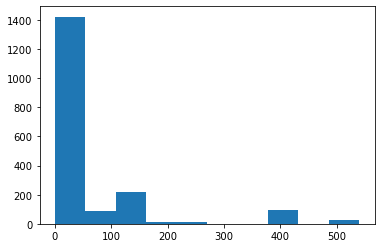

In [92]:
plt.hist(df['diff'])

(array([112., 219.,   0.,  13.,  13.,   0.,   0.,  95.,   0.,  26.]),
 array([ 25. ,  76.5, 128. , 179.5, 231. , 282.5, 334. , 385.5, 437. ,
        488.5, 540. ]),
 <a list of 10 Patch objects>)

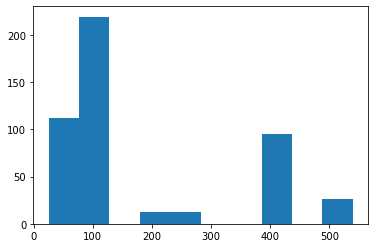

In [83]:
plt.hist(problem_df['diff'])

In [95]:
good_percent = str(100 - (problem_df.shape[0] / df.shape[0]) * 100)[:5]
print(f'{good_percent} of the trips have the exact same travel time')

74.47 of the trips have the exact same travel time


In [117]:
df.nunique()

stop_id_source      67
stop_id_target      67
time_sec           917
stop_lon_target     67
stop_lat_target     67
arrival_target     218
stop_lon_source     67
stop_lat_source     67
departure           60
ID_STOP_START       67
TIME_DEPART         59
ID_STOP_DEST        67
TIME_ARRIVAL       235
TRAVEL_TIME        978
diff                 9
dtype: int64

In [116]:
problem_df.nunique()

stop_id_source      31
stop_id_target      37
time_sec           446
stop_lon_target     37
stop_lat_target     37
arrival_target     121
stop_lon_source     31
stop_lat_source     31
departure           25
ID_STOP_START       31
TIME_DEPART         25
ID_STOP_DEST        37
TIME_ARRIVAL        87
TRAVEL_TIME        449
diff                 8
time_depart         25
time_arrival        87
depart_diff         10
arrival_diff        13
dtype: int64